In [ ]:
import torch, torchvision
from torchvision.io import read_image
from torchvision import transforms

In [ ]:
!wget https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena_gray.gif

--2023-11-25 01:24:11--  https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena_gray.gif
Resolving www.cosy.sbg.ac.at (www.cosy.sbg.ac.at)... 141.201.2.14
Connecting to www.cosy.sbg.ac.at (www.cosy.sbg.ac.at)|141.201.2.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264598 (258K) [image/gif]
Saving to: ‘lena_gray.gif’

lena_gray.gif       100%[===================>] 258.40K   537KB/s    in 0.5s    

2023-11-25 01:24:12 (537 KB/s) - ‘lena_gray.gif’ saved [264598/264598]



In [ ]:
from PIL import Image

In [ ]:
im = Image.open('lena_gray.gif') #.convert('L')
#im = Image.open('five.png').convert('L')

In [ ]:
#gray_image = torchvision.transforms.Grayscale()(im)

In [ ]:
#im.mode

In [ ]:
import numpy as np

In [ ]:
im = np.array(im)

In [ ]:
import matplotlib.pyplot as plt

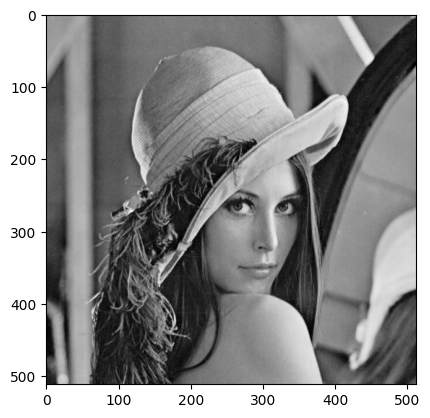

In [ ]:
plt.imshow(im, cmap='gray')

In [ ]:
np.array(im).shape

(512, 512)

In [ ]:
kernel = torch.tensor([[1,0,-1],[1,0,-1],[1,0,-1]]).to(torch.float)
#kernel = 0.2*torch.ones(3,3)

In [ ]:
kernel

tensor([[0.2000, 0.2000, 0.2000],
        [0.2000, 0.2000, 0.2000],
        [0.2000, 0.2000, 0.2000]])

In [ ]:
import torch.nn as nn

In [ ]:
from torch.nn.functional import conv2d

In [ ]:
conv = conv2d(torch.tensor(im, dtype=torch.float).unsqueeze(0).unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0))

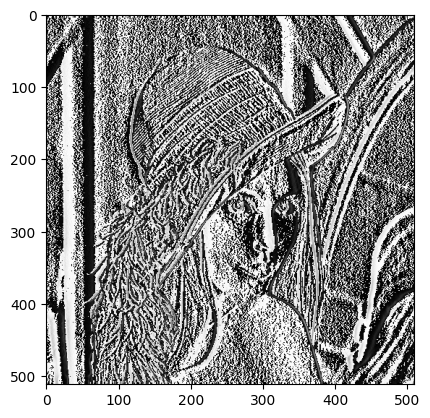

In [ ]:
plt.imshow(im[:,:-2]-im[:,2:], cmap='gray',vmin=0, vmax=255)

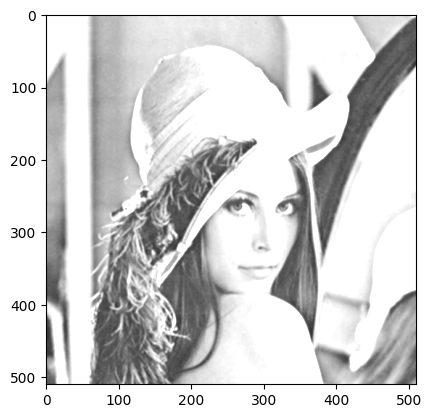

In [ ]:
plt.imshow(conv.abs().squeeze(0).permute(1,2,0), cmap='gray', vmin=0, vmax=255)

In [ ]:
!wget https://raw.githubusercontent.com/hse-ds/iad-deep-learning/master/2023/seminars/03.%20Image%20Classification/filter_viz.py

--2023-11-25 00:44:57--  https://raw.githubusercontent.com/hse-ds/iad-deep-learning/master/2023/seminars/03.%20Image%20Classification/filter_viz.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3188 (3.1K) [text/plain]
Saving to: ‘filter_viz.py’

filter_viz.py       100%[===================>]   3.11K  --.-KB/s    in 0s      

2023-11-25 00:44:57 (52.6 MB/s) - ‘filter_viz.py’ saved [3188/3188]



In [ ]:
from filter_viz import plot_filters

In [ ]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    ]
)

cifar_train = torchvision.datasets.CIFAR10(
    root="./cifar", train=True, download=True, transform=transform
)
cifar_val = torchvision.datasets.CIFAR10(
    root="./cifar", train=False, download=True, transform=transform
)

100%|██████████| 170498071/170498071 [00:02<00:00, 78266119.33it/s]


Extracting ./cifar/cifar-10-python.tar.gz to ./cifar
Files already downloaded and verified


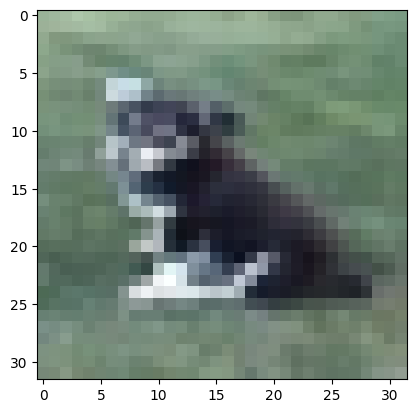

In [ ]:
plt.imshow(cifar_train[70][0].permute(1,2,0)*torch.tensor([0.247, 0.243, 0.261])+torch.tensor([0.4914, 0.4822, 0.4465]))

In [ ]:
cifar_train[70][1]

5

In [ ]:
train_dataloader = torch.utils.data.DataLoader(
    cifar_train, batch_size=32, shuffle=True, num_workers=2
)
val_dataloader = torch.utils.data.DataLoader(
    cifar_val, batch_size=32, shuffle=False, num_workers=2
)

In [ ]:
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    #img = img * torch.tensor([0.247, 0.243, 0.261])+torch.tensor([0.4914, 0.4822, 0.4465]) # / 2 + 0.5
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0))*np.array([0.247, 0.243, 0.261])+np.array([0.4914, 0.4822, 0.4465]))


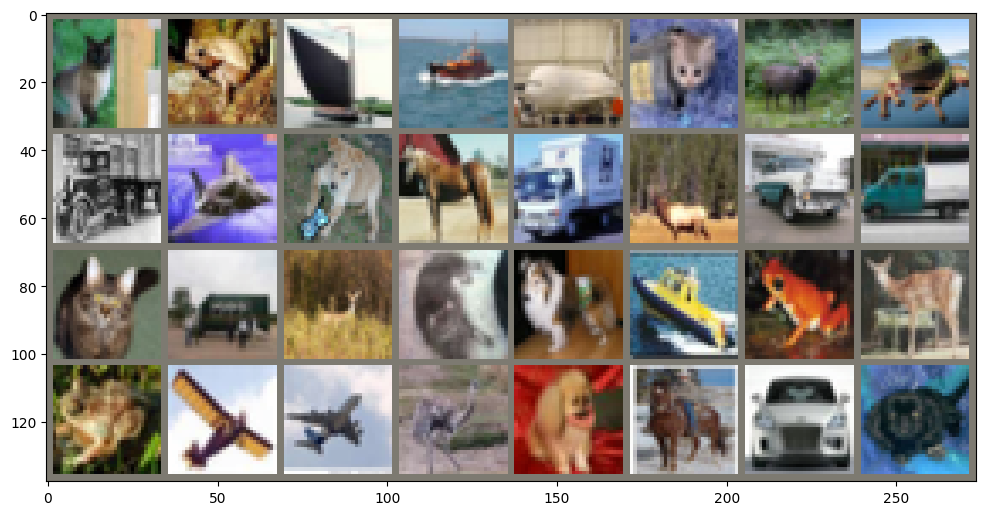

In [ ]:
images, labels = next(iter(train_dataloader))

plt.figure(figsize=(12, 12))
# create grid of images
img_grid = torchvision.utils.make_grid(images)
# show images
matplotlib_imshow(img_grid, one_channel=False)

In [ ]:
import torch.nn.functional as F

In [ ]:
class MyModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.VGG = nn.Sequential(nn.Conv2d(3,16,3, padding=1), nn.ReLU(), nn.Conv2d(16,16,5, padding=2), nn.ReLU(), nn.MaxPool2d(2,2))
    self.fc1 = nn.Linear(16**3, 128)
    self.fc2 = nn.Linear(128,10)
    self.flat = nn.Flatten()

  def forward(self, x):
    x = self.VGG(x)
    x = self.flat(x)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x



In [ ]:
model = MyModel()

In [ ]:
model.forward(torch.zeros(2, 3, 32, 32))

tensor([[-0.0068,  0.0676,  0.0018,  0.0199, -0.0635,  0.0632,  0.0763, -0.0373,
          0.0282,  0.0070],
        [-0.0068,  0.0676,  0.0018,  0.0199, -0.0635,  0.0632,  0.0763, -0.0373,
          0.0282,  0.0070]], grad_fn=<AddmmBackward0>)

In [ ]:
from torch.optim import Adam

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters())

In [ ]:
from tqdm import tqdm

In [ ]:
for epoch in range(10):
  for x, y in tqdm(train_dataloader):
    y_pred = model.forward(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  with torch.no_grad():
    acc = []
    for x,y in val_dataloader:
      y_pred = model.forward(x).argmax(-1)
      acc.append((y_pred == y).sum().item()/len(y))
  print(loss.item(), np.mean(acc))

100%|██████████| 1563/1563 [01:38<00:00, 15.88it/s]


0.8093045949935913 0.6346845047923323


100%|██████████| 1563/1563 [01:43<00:00, 15.10it/s]


1.1749862432479858 0.6674321086261981


  3%|▎         | 48/1563 [00:02<01:30, 16.70it/s]


KeyboardInterrupt: ignored

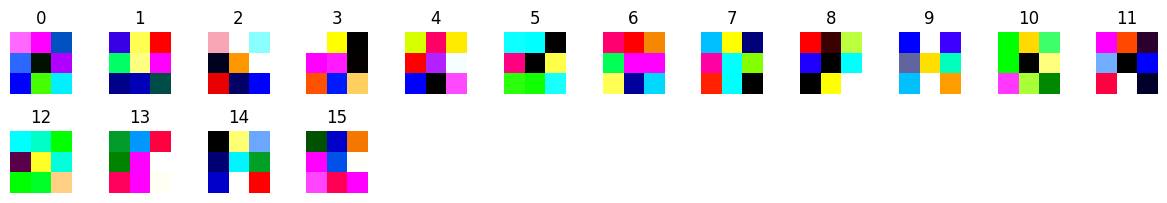

In [ ]:
plot_filters(model.VGG[0], single_channel=False)

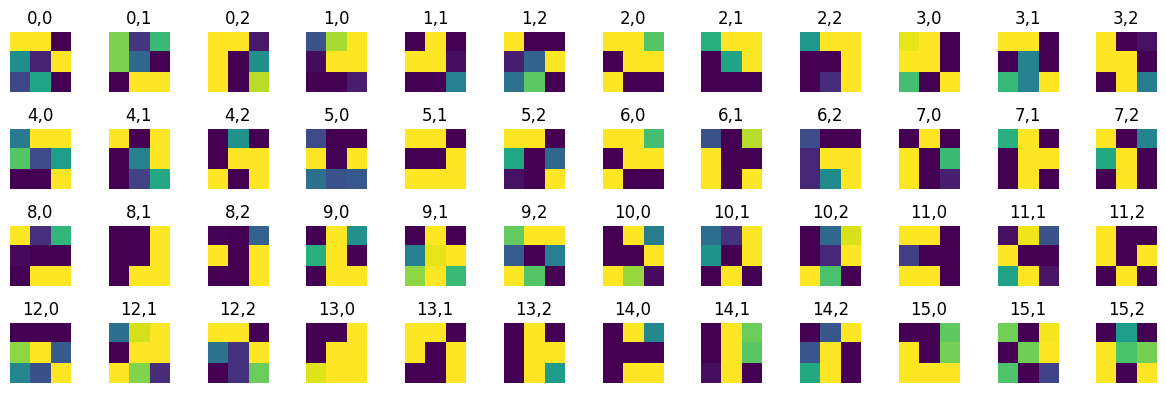

In [ ]:
plot_filters(model.VGG[0], single_channel=True)